## Questão 9
Carregue os dados contidos no Dataset de Câncer (breast cancer) do scikit-learn. - Divida o conjunto de dados entre treino e teste.  - Utilize o Classificador baseado em Redes Neurais (MLPClassifier) para realizar a classificação dos dados carregados. - Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25] e [50,50] e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de treino para cada valor do parâmetro. 
Varie o parâmetro hidden_layer_sizes para [10,10], [25,50], [50,25], e [50,50] e mostre um gráfico contendo a diferença entre os scores obtidos no conjunto de teste para cada valor do parâmetro. Justifique as diferenças apresentadas em nos gráficos do treino e do teste para cada valor de hidden_layer_sizes. Altere o parâmetro alpha para 0.0001, 0.001 e 0.01 e repita os experimentos realizados mostrando os mesmos gráficos. Justifique os resultados obtidos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-paper')
%matplotlib inline

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [2]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
X_scale = scale(X)
y = breast_cancer.target
class_names = breast_cancer.target_names

In [3]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_scale, y, 
                                                        test_size = 0.20, 
                                                        random_state = 57)

In [4]:
t_camadas = [[10,10], [25,50], [50,25], [50,50]]
tamanho_x = np.arange(1, 5, 1)
t_camadas

[[10, 10], [25, 50], [50, 25], [50, 50]]

In [5]:
treino = []
teste = []
for n in t_camadas:
    model = MLPClassifier(hidden_layer_sizes=n, random_state=57)
    model.fit(X_treino, y_treino)
    treino.append(model.score(X_treino, y_treino))
    teste.append(model.score(X_teste, y_teste))

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


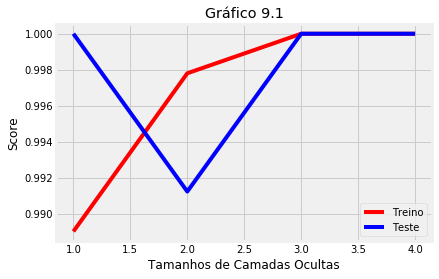

In [6]:
plt.plot(tamanho_x, treino, c='r', label='Treino')
plt.plot(tamanho_x, teste, c='b', label='Teste')
plt.title('Gráfico 9.1')
plt.ylabel('Score')
plt.xlabel('Tamanhos de Camadas Ocultas')
plt.legend()
plt.savefig('imagens/Questão-9.png', transparent = True)
plt.show()

In [7]:
alpha = [0.0001, 0.001, 0.01]
tamanho_x_alpha = np.arange(1, 13, 1)

In [8]:
treino_alpha = []
teste_alpha = []
for n in t_camadas:
    for a in alpha:
        model = MLPClassifier(hidden_layer_sizes=n, alpha=a, random_state=57)
        model.fit(X_treino, y_treino)
        treino_alpha.append(model.score(X_treino, y_treino))
        teste_alpha.append(model.score(X_teste, y_teste))

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
label_x = ['[10,10], 0.0001', '[25,50], 0.0001', '[50,25], 0.0001', '[50,50], 0.0001', 
          '[10,10], 0.001', '[25,50], 0.001', '[50,25], 0.001', '[50,50], 0.001',
          '[10,10], 0.01', '[25,50], 0.01', '[50,25], 0.01', '[50,50], 0.01']

In [14]:
type(label_x)

list

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

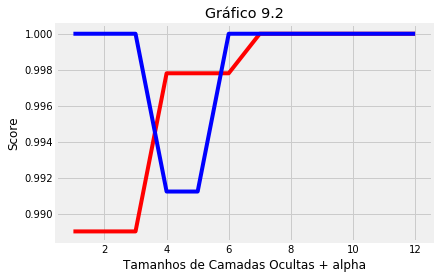

In [17]:
plt.plot(tamanho_x_alpha, treino_alpha, c='r', label='Treino')
plt.plot(tamanho_x_alpha, teste_alpha, c='b', label='Teste')
plt.title('Gráfico 9.2')
plt.ylabel('Score')
plt.xlabel('Tamanhos de Camadas Ocultas + alpha')
plt.xticks(tamanho_x_alpha, labels, rotation='vertical')
plt.legend()
plt.savefig('imagens/Questão-92.png', transparent = True)
plt.show()